# Figure water level
## Glaciohydrological analysis in Mocho glacier - 2023
#### Paul Sandoval Quilodrán - https://github.com/SQPaul/...

#### import packages

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import plotly.express as px

from matplotlib.ticker import FormatStrFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

# Water level

In [2]:
# read data
#mocho = pd.read_csv(r"C:/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/HOBO/streamflow/caudales/mocho_v2.csv",index_col="date")
mocho = pd.read_csv('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/HOBO/streamflow/caudales/mocho_v2.csv',index_col="date")
mocho.index = pd.to_datetime(mocho.index)

#pmocho = pd.read_csv(r"C:/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/HOBO/streamflow/caudales/pmocho_v2.csv",index_col="date")
pmocho = pd.read_csv('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/HOBO/streamflow/caudales/pmocho_v2.csv',index_col="date")
pmocho.index = pd.to_datetime(pmocho.index)
pmocho

,h(m),q(m3/s)
date,,
2023-02-19 14:00:00,0.267554,0.107582
2023-02-19 14:15:00,0.347026,0.135409
2023-02-19 14:30:00,0.309669,0.122432
2023-02-19 14:45:00,0.312456,0.123406
2023-02-19 15:00:00,0.310043,0.122563
...,...,...
2023-04-16 13:15:00,0.281592,0.112560
2023-04-16 13:30:00,0.280742,0.112260
2023-04-16 13:45:00,0.286181,0.114181


# Temperature

In [4]:
#t_mocho = pd.read_csv(r"C:\Users\pauls\Desktop\MSc_WaterResources\Tesis\1.-Tidy\HOBO\processed\mocho_pressure_v1.csv",index_col="date")
t_mocho = pd.read_csv('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/HOBO/processed/mocho_pressure_v1.csv',index_col="date")
t_mocho.index = pd.to_datetime(t_mocho.index)

#t_pmocho = pd.read_csv(r"C:\Users\pauls\Desktop\MSc_WaterResources\Tesis\1.-Tidy\HOBO\processed\pichimocho_pressure_v1.csv",index_col="date")
t_pmocho = pd.read_csv('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/HOBO/processed/pichimocho_pressure_v1.csv',index_col="date")
t_pmocho.index = pd.to_datetime(t_pmocho.index)

mocho["T(°C)"] = t_mocho.iloc[:,1]
pmocho["T(°C)"] = t_pmocho.iloc[:,1]

pmocho.iloc[0,2] = np.nan

#mocho.to_csv('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/HOBO/processed/mocho_complete_v2.csv',index_label="date")
#pmocho.to_csv('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/HOBO/processed/pichi-mocho_complete_v2.csv',index_label="date")

pmocho

,h(m),q(m3/s),T(°C)
date,,,
2023-02-19 14:00:00,0.267554,0.107582,NaN
2023-02-19 14:15:00,0.347026,0.135409,10.160667
2023-02-19 14:30:00,0.309669,0.122432,9.964667
2023-02-19 14:45:00,0.312456,0.123406,10.161000
2023-02-19 15:00:00,0.310043,0.122563,10.259000
...,...,...,...
2023-04-16 13:15:00,0.281592,0.112560,3.613000
2023-04-16 13:30:00,0.280742,0.112260,3.823000
2023-04-16 13:45:00,0.286181,0.114181,3.928000


In [5]:
pmocho2 = pmocho.reindex(mocho.index)


limits = [pd.to_datetime("2023-03-13 23:00")]

limits_index = [mocho.index.get_loc(limits[0])]

limits2 = [pd.to_datetime("2023-03-13 23:00")]

limits_index2 = [pmocho.index.get_loc(limits2[0])]

# limits = [pd.to_datetime("2022-12-27 17:00"),
#           pd.to_datetime("2023-02-18 15:00"),
#           pd.to_datetime("2023-04-15 13:00")]

# limits_index = [mocho.index.get_loc(limits[0]),
#                 mocho.index.get_loc(limits[1]),
#                 mocho.index.get_loc(limits[2])]

# limits2 = [pd.to_datetime("2023-02-19 16:00"),
#           pd.to_datetime("2023-04-16 13:00")]

# limits_index2 = [pmocho.index.get_loc(limits2[0]),
#                 pmocho.index.get_loc(limits2[1])]



In [6]:
window_size = 12

mocho_ma = mocho.rolling(window=window_size).mean()
pmocho_ma = pmocho.rolling(window=window_size).mean()
pmocho2_ma = pmocho2.rolling(window=window_size).mean()

mocho_ma.index = mocho_ma.index.strftime('%d-%m-%Y')
pmocho_ma.index = pmocho_ma.index.strftime('%d-%m-%Y')
pmocho2_ma.index  = pmocho2_ma.index.strftime('%d-%m-%Y')

In [7]:
mocho_h = mocho.resample("H").mean()
pmocho_h = pmocho.resample("H").mean()
pmocho2_h = pmocho2.resample("H").mean()

mocho_h.index = mocho_h.index.strftime('%d-%m-%Y')
pmocho_h.index = pmocho_h.index.strftime('%d-%m-%Y')
pmocho2_h.index  = pmocho2_h.index.strftime('%d-%m-%Y')

In [8]:
mocho.index = mocho.index.strftime('%d-%m-%Y')
pmocho.index = pmocho.index.strftime('%d-%m-%Y')
pmocho2.index  = pmocho2.index.strftime('%d-%m-%Y')

In [9]:
mocho_h.mean()

h(m)       0.540067
q(m3/s)    4.681821
T(°C)      6.082476
dtype: float64

In [10]:
mocho_h.std()

h(m)       0.133156
q(m3/s)    0.455230
T(°C)      0.971388
dtype: float64

In [11]:
pmocho_h.mean()

h(m)       0.312960
q(m3/s)    0.123485
T(°C)      6.323374
dtype: float64

In [12]:
pmocho_h.std()

h(m)       0.038785
q(m3/s)    0.013441
T(°C)      2.181652
dtype: float64

In [13]:
mocho_h.std()/mocho_h.mean()*100

h(m)       24.655398
q(m3/s)     9.723360
T(°C)      15.970270
dtype: float64

In [14]:
pmocho_h.std()/pmocho_h.mean()*100

h(m)       12.393035
q(m3/s)    10.884972
T(°C)      34.501385
dtype: float64

In [17]:
pmocho2_ma

,h(m),q(m3/s),T(°C)
date,,,
27-12-2022,NaN,NaN,NaN
27-12-2022,NaN,NaN,NaN
27-12-2022,NaN,NaN,NaN
27-12-2022,NaN,NaN,NaN
27-12-2022,NaN,NaN,NaN
...,...,...,...
15-04-2023,0.334460,0.131050,2.492917
15-04-2023,0.330268,0.129593,2.563917
15-04-2023,0.326458,0.128267,2.655500


### Plot moving average

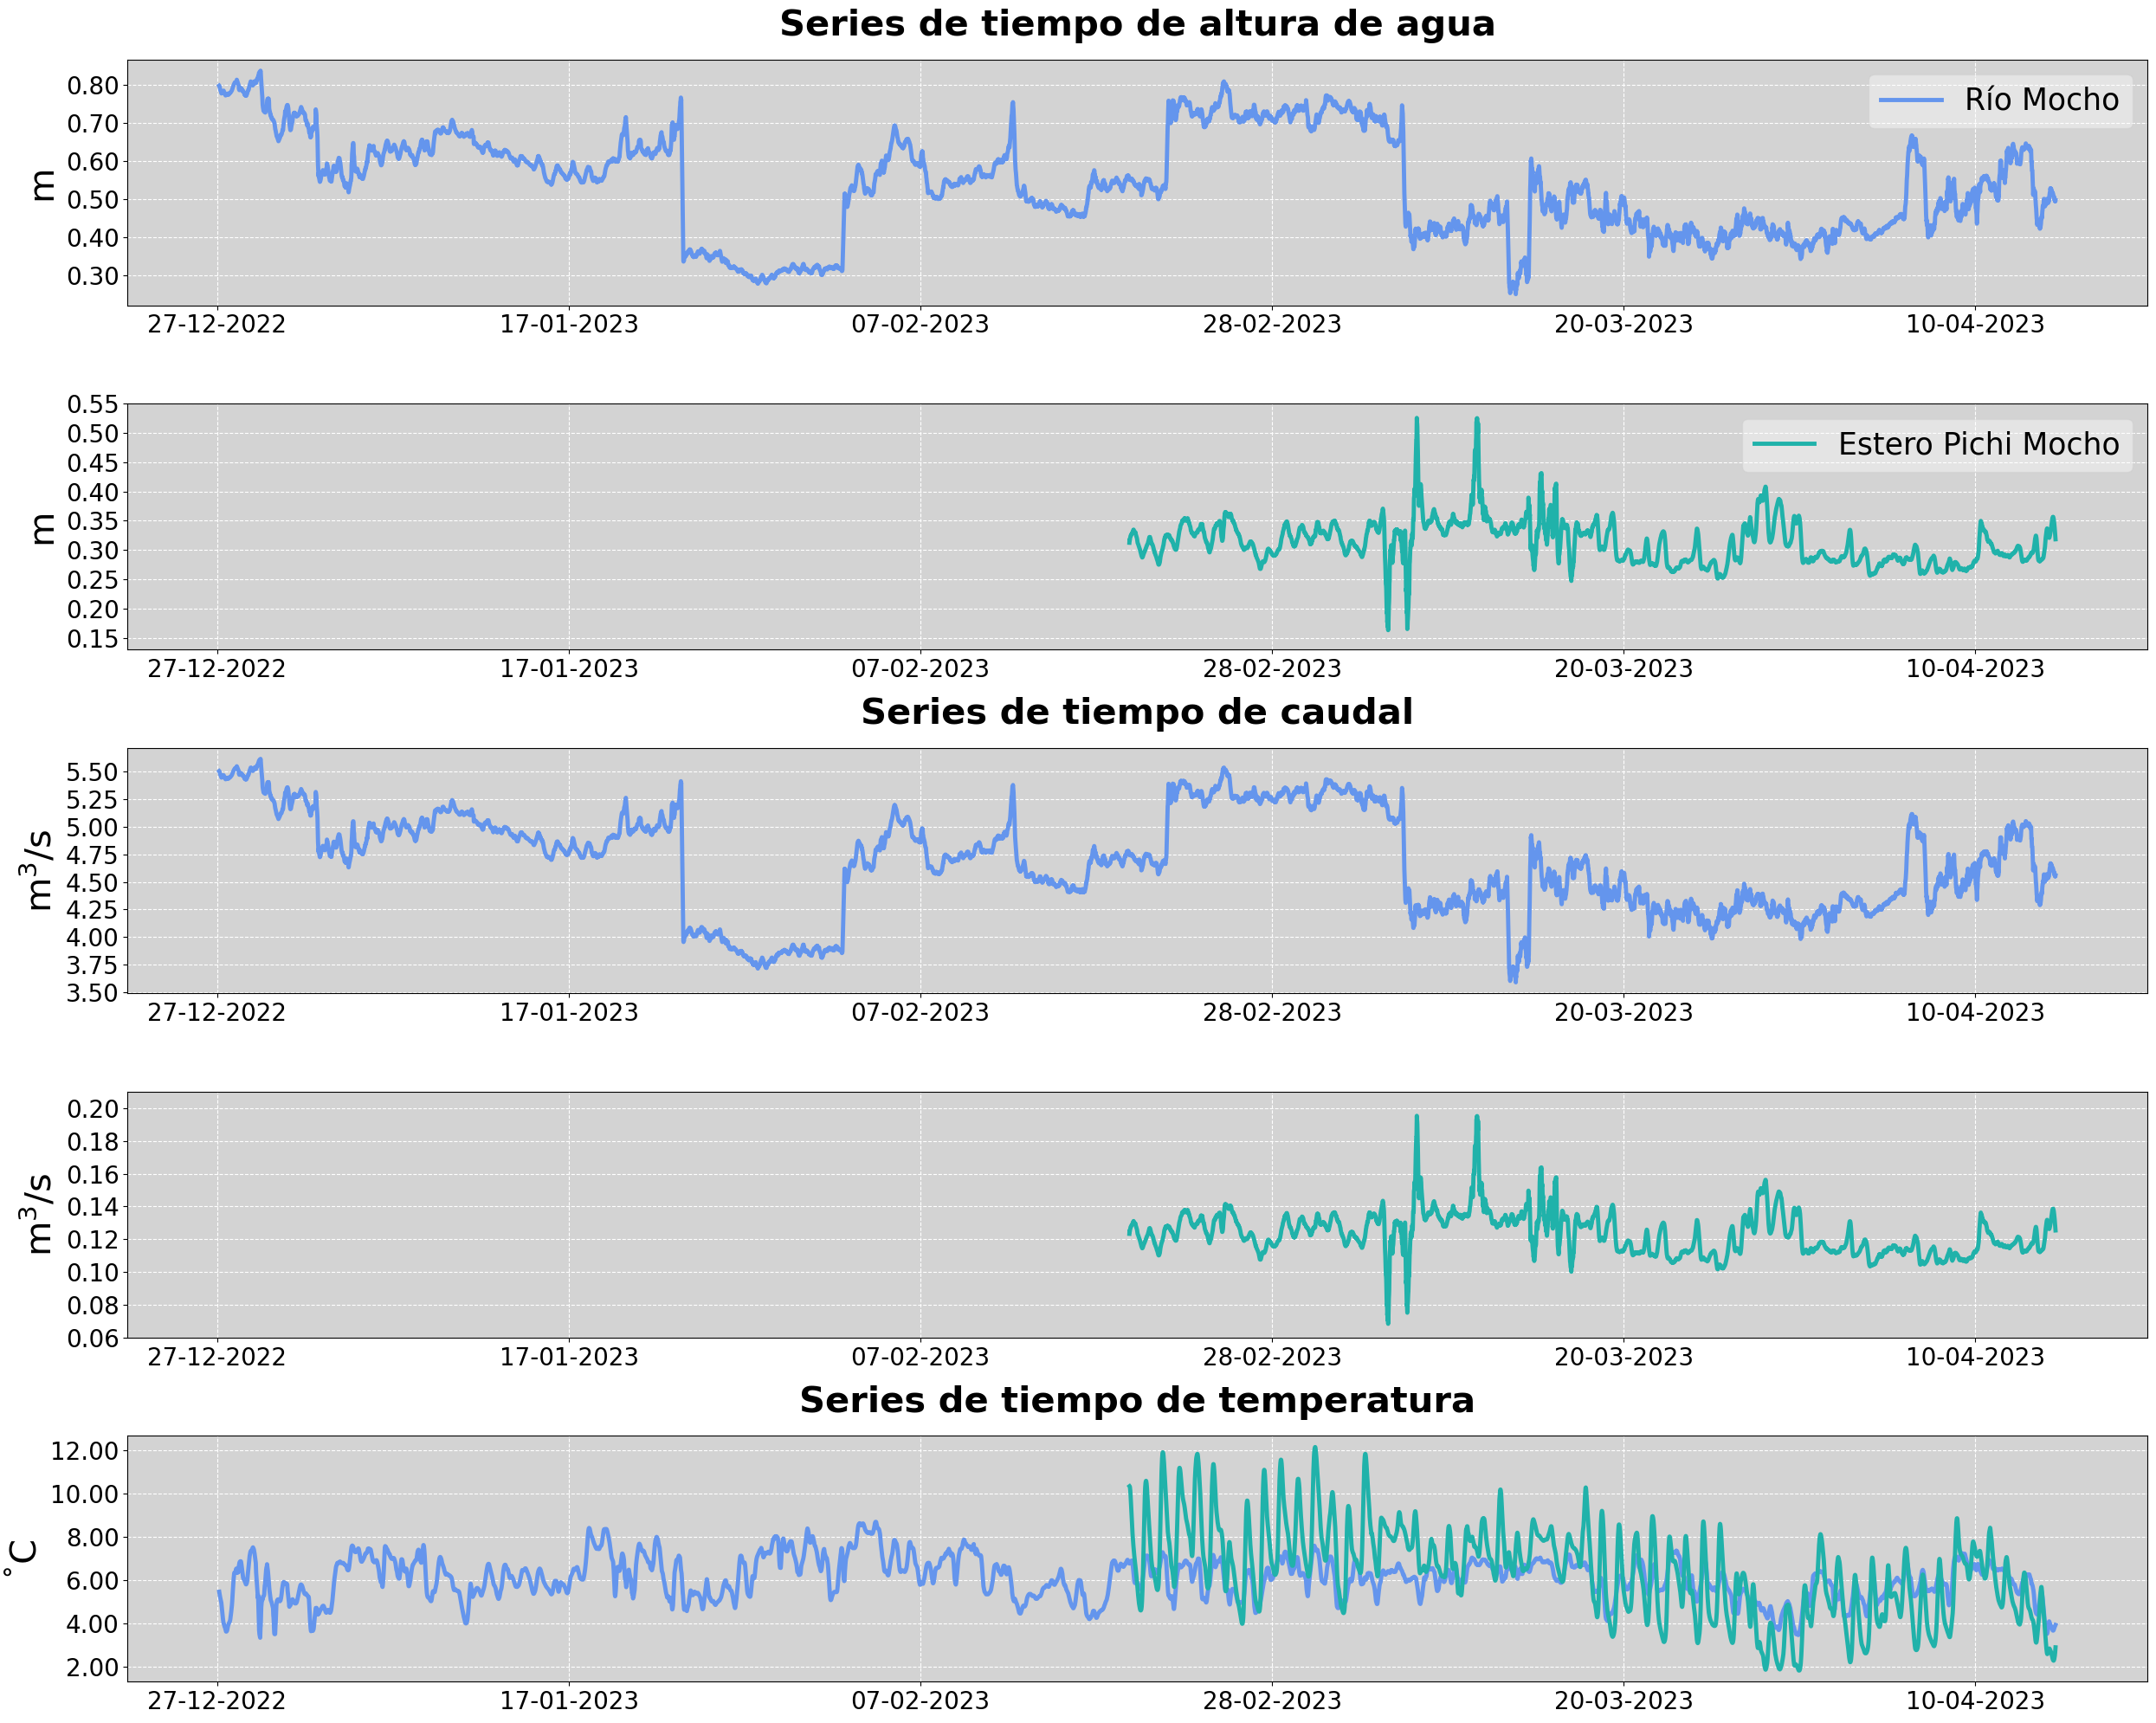

In [46]:
#Define subplots dimensions
fig = plt.figure(figsize=(25,20))

#############################################################
##################### WATER LEVEL ###########################
#############################################################
ax3 = fig.add_subplot(511)
mocho_ma.iloc[:,0].plot(ax=ax3, color="cornflowerblue",alpha=1,linewidth=3.5,label="Río Mocho")
#Label
ax3.set_ylabel("m",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax3.set_xlabel("",labelpad=0,fontsize=0)
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#Configuration
ax3.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
plt.title("Series de tiempo de altura de agua",fontsize=30,pad=20,fontweight="bold")
fig.set_facecolor("white") 
plt.legend(fontsize=25,loc='upper right',framealpha=0.4)
############################################################################
ax4 = fig.add_subplot(512)
#mocho.iloc[:,1].plot(ax=ax1, color="royalblue",alpha=1,linewidth=2,label="")
mocho_ma.iloc[:,0].plot(ax=ax4, color="cornflowerblue",alpha=1,linewidth=0,label="")
pmocho2_ma.iloc[:,0].plot(ax=ax4, color="lightseagreen",alpha=1,linewidth=3.5,label="Estero Pichi Mocho")
plt.ylim([0.13, 0.55]) 
#aws_maourly.iloc[:,1].plot(ax=ax1, color="crimson",alpha=1,linewidth=4)
ax4.set_xlabel("",labelpad=0,fontsize=0)
ax4.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#Label
ax4.set_ylabel("m",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
#plt.title("aa",fontsize=0,pad=0,fontweight="bold")
#Configuration
ax4.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
plt.legend(fontsize=25,loc='upper right',framealpha=0.4)
#############################################################
##################### STREAMFLOW MOCHO #####################
#############################################################
ax0 = fig.add_subplot(513)
mocho_ma.iloc[:,1].plot(ax=ax0, color="cornflowerblue",alpha=1,linewidth=3.5,label="Río Mocho")
#Label
ax0.set_ylabel("m$^3$/s",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax0.set_xlabel("",labelpad=0,fontsize=0)
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#Configuration
ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(1,1), bbox_transform=ax0.transAxes,fontsize=15)
plt.title("Series de tiempo de caudal",fontsize=30,pad=20,fontweight="bold")
fig.set_facecolor("white")  
#plt.legend(fontsize=40,loc='upper right',framealpha=0.4)
#############################################################
################# WATER LEVEL PICHI MOCHO ###################
#############################################################
ax1 = fig.add_subplot(514)
mocho_ma.iloc[:,1].plot(ax=ax1, color="cornflowerblue",alpha=1,linewidth=3.5,label="")
pmocho2_ma.iloc[:,1].plot(ax=ax1, color="lightseagreen",alpha=1,linewidth=3.5,label="Estero Pichi Mocho")
plt.ylim([0.06, 0.21]) 
ax1.set_xlabel("",labelpad=0,fontsize=0)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#Label
ax1.set_ylabel("m$^3$/s",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
#Configuration
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#plt.legend(fontsize=40,loc='upper right',framealpha=0.4)
#############################################################
####################### TEMPERATURE #########################
#############################################################
ax2 = fig.add_subplot(515)
mocho_ma.iloc[:,2].plot(ax=ax2, color="cornflowerblue",alpha=1,linewidth=3.5,label="")
pmocho2_ma.iloc[:,2].plot(ax=ax2, color="lightseagreen",alpha=1,linewidth=3.5,label="")
ax2.set_xlabel("",labelpad=5,fontsize=15)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#Label
ax2.set_ylabel("$^°$C",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
#Configuration
ax2.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#plt.legend(fontsize=25)
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(1.19,1), bbox_transform=ax0.transAxes,fontsize=25)
plt.title("Series de tiempo de temperatura",fontsize=30,pad=20,fontweight="bold")
#General configuration
plt.tight_layout()
plt.rcParams.update({
    "savefig.facecolor": (0.0, 0.0, 0.0, 0)})  #  alpha = 0% (r,g,b,alpha)
#fig.suptitle("Series de tiempo de caudal",fontweight="bold",fontsize=32) #TOKEN

fig.subplots_adjust(hspace=0.4)

fig.savefig('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/Figures/Caudal_y_temperatura_moving-avg-12step_v2.png', bbox_inches="tight",dpi=300) #TOKEN
plt.show()

## Plot moving hourly

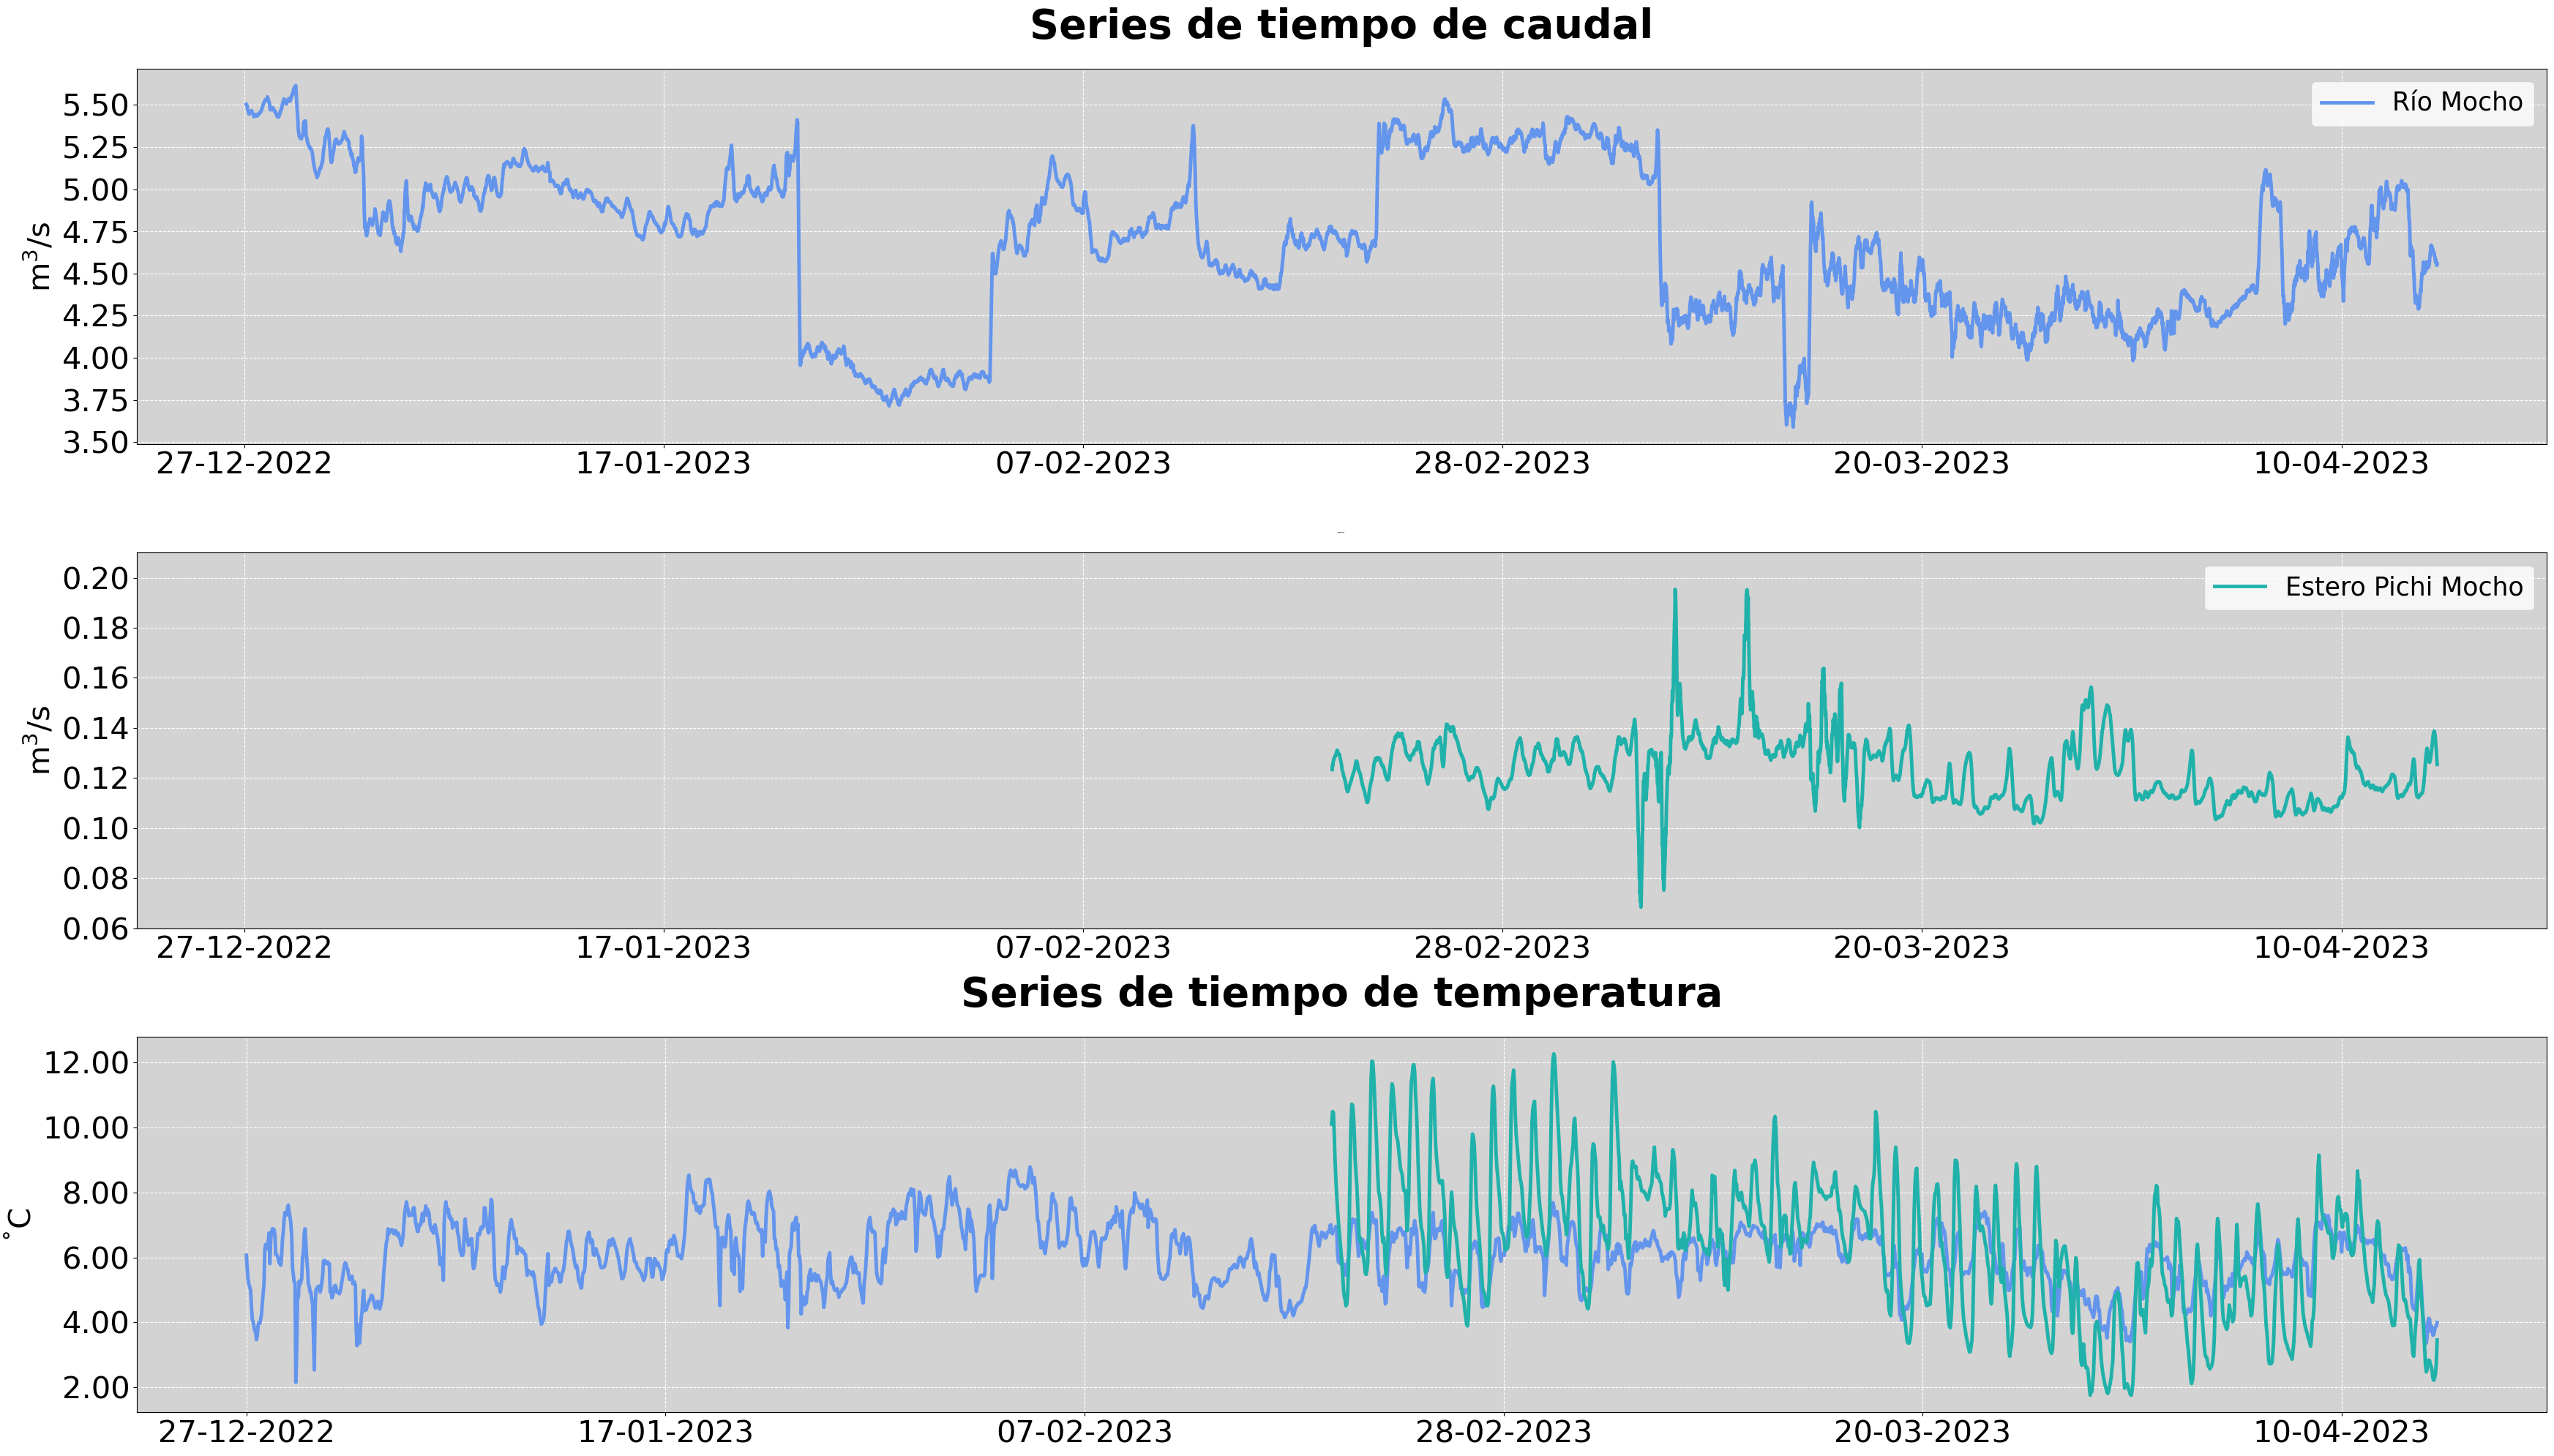

In [39]:
#Define subplots dimensions
fig = plt.figure(figsize=(35,20))

#############################################################
##################### WATER LEVEL MOCHO #####################
#############################################################

ax0 = fig.add_subplot(311)
mocho_ma.iloc[:,1].plot(ax=ax0, color="cornflowerblue",alpha=1,linewidth=3.5,label="Río Mocho")

#ax3 = ax0.twinx()

#pmocho.iloc[:,1].plot(ax=ax0, color="lightseagreen",alpha=1,linewidth=2,label="Estero Pichi Mocho")

#aws.iloc[:,0].plot(ax=ax0, color="red",alpha=1,linewidth=2,label="Presión atm")
#aws_maourly.iloc[:,0].plot(ax=ax0, color="steelblue",alpha=1,linewidth=4)

#Label
ax0.set_ylabel("m$^3$/s",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=30)
plt.xticks(rotation = 0,fontsize=30)
ax0.set_xlabel("",labelpad=5,fontsize=20)
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#Configuration
ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(1,1), bbox_transform=ax0.transAxes,fontsize=15)
plt.title("Series de tiempo de caudal",fontsize=40,pad=30,fontweight="bold")
fig.set_facecolor("white")

#for limit in limits_index:
#    plt.axvline(x=limit,color="indianred", linestyle='--', linewidth=6,label="Fin periodo de modelación")
    
plt.legend(fontsize=25,loc='upper right')

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))


#############################################################
################# WATER LEVEL PICHI MOCHO ###################
#############################################################

ax1 = fig.add_subplot(312)
#mocho.iloc[:,1].plot(ax=ax1, color="royalblue",alpha=1,linewidth=2,label="")
mocho_ma.iloc[:,1].plot(ax=ax1, color="cornflowerblue",alpha=1,linewidth=0,label="")
pmocho2_ma.iloc[:,1].plot(ax=ax1, color="lightseagreen",alpha=1,linewidth=3.5,label="Estero Pichi Mocho")
#aws_maourly.iloc[:,1].plot(ax=ax1, color="crimson",alpha=1,linewidth=4)

plt.ylim([0.06, 0.21]) 

ax1.set_xlabel("",labelpad=0,fontsize=0)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#Label
ax1.set_ylabel("m$^3$/s",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=30)
plt.xticks(rotation = 0,fontsize=30)

#for limit in limits_index2:
#    plt.axvline(x=limit,color="indianred", linestyle='--', linewidth=6)

#Configuration
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
plt.legend(fontsize=25,loc='upper right')
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(1.19,1), bbox_transform=ax0.transAxes,fontsize=25)
plt.title("Temperatura",fontsize=0,pad=20,fontweight="bold")


#############################################################
####################### TEMPERATURE #########################
#############################################################

ax2 = fig.add_subplot(313)
mocho_h.iloc[:,2].plot(ax=ax2, color="cornflowerblue",alpha=1,linewidth=3.5,label="")
pmocho2_h.iloc[:,2].plot(ax=ax2, color="lightseagreen",alpha=1,linewidth=3.5,label="")
#aws_maourly.iloc[:,1].plot(ax=ax1, color="crimson",alpha=1,linewidth=4)

ax2.set_xlabel("",labelpad=5,fontsize=30)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#Label
ax2.set_ylabel("$^°$C",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=30)
plt.xticks(rotation = 0,fontsize=30)


#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=10))

#plt.xticks(rotation=45, fontsize=20)

#Configuration
ax2.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#plt.legend(fontsize=25)
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(1.19,1), bbox_transform=ax0.transAxes,fontsize=25)
plt.title("Series de tiempo de temperatura",fontsize=40,pad=30,fontweight="bold")

#fig.set_facecolor("white")
#General configuration
plt.tight_layout()
#fig.subplots_adjust(top=0.92)

#fig.subplots_adjust(top=1.1)

plt.rcParams.update({
    "savefig.facecolor": (0.0, 0.0, 0.0, 0)})  #  alpha = 0% (r,g,b,alpha)

#fig.suptitle("Series de tiempo de caudal",fontweight="bold",fontsize=32) #TOKEN
plt.show()
fig.savefig('/media/phi/Acer/Users/pauls/Desktop/MSc_WaterResources/Tesis/1.-Tidy/Figures/Caudal_y_temperatura_v20.png', bbox_inches="tight",dpi=300) #TOKEN

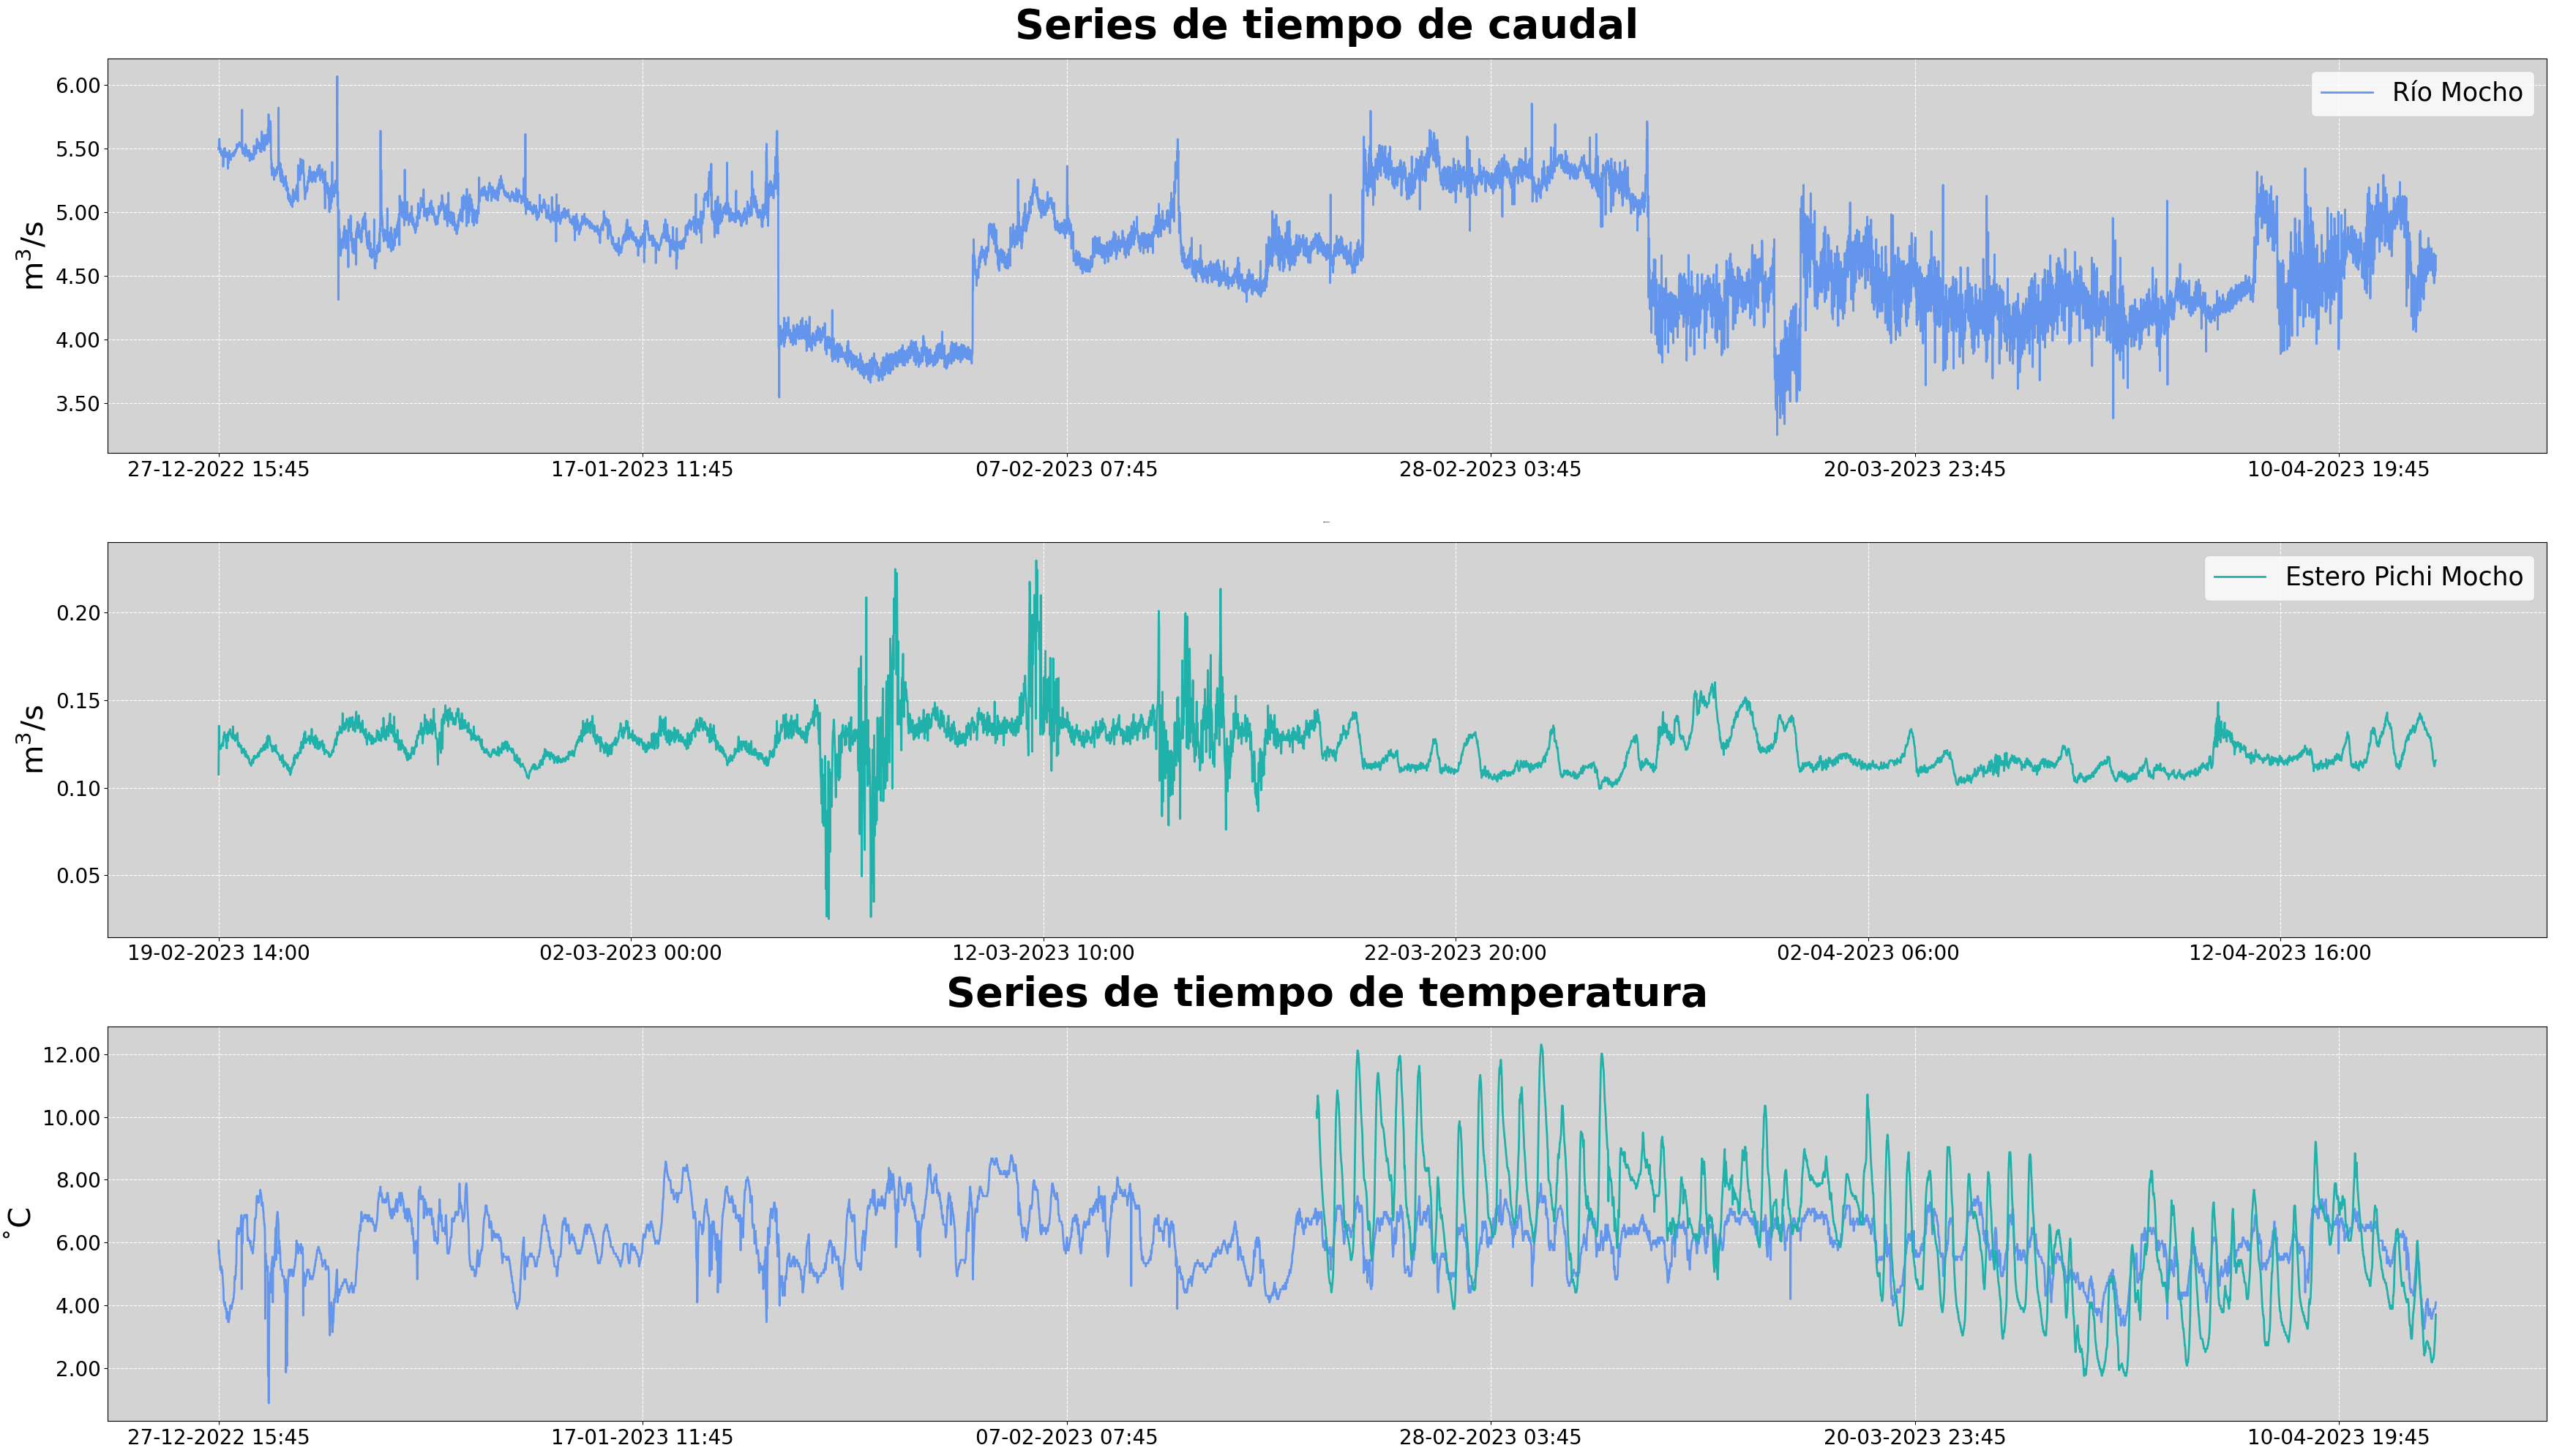

In [40]:
#Define subplots dimensions
fig = plt.figure(figsize=(35,20))

#############################################################
##################### WATER LEVEL MOCHO #####################
#############################################################

ax0 = fig.add_subplot(311)
mocho.iloc[:,1].plot(ax=ax0, color="cornflowerblue",alpha=1,linewidth=2,label="Río Mocho")

#ax3 = ax0.twinx()

#pmocho.iloc[:,1].plot(ax=ax0, color="lightseagreen",alpha=1,linewidth=2,label="Estero Pichi Mocho")

#aws.iloc[:,0].plot(ax=ax0, color="red",alpha=1,linewidth=2,label="Presión atm")
#aws_hourly.iloc[:,0].plot(ax=ax0, color="steelblue",alpha=1,linewidth=4)

#Label
ax0.set_ylabel("m$^3$/s",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=20)
plt.xticks(rotation = 0,fontsize=20)
ax0.set_xlabel("",labelpad=5,fontsize=15)
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#Configuration
ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(1,1), bbox_transform=ax0.transAxes,fontsize=15)
plt.title("Series de tiempo de caudal",fontsize=40,pad=20,fontweight="bold")
fig.set_facecolor("white")

#for limit in limits_index:
#    plt.axvline(x=limit,color="indianred", linestyle='--', linewidth=6,label="Fin periodo de modelación")
    
plt.legend(fontsize=25,loc='upper right')

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))


#############################################################
################# WATER LEVEL PICHI MOCHO ###################
#############################################################

ax1 = fig.add_subplot(312)
#mocho.iloc[:,1].plot(ax=ax1, color="royalblue",alpha=1,linewidth=2,label="")
pmocho.iloc[:,1].plot(ax=ax1, color="lightseagreen",alpha=1,linewidth=2,label="Estero Pichi Mocho")
#aws_hourly.iloc[:,1].plot(ax=ax1, color="crimson",alpha=1,linewidth=4)

ax1.set_xlabel("",labelpad=0,fontsize=0)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#Label
ax1.set_ylabel("m$^3$/s",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=20)
plt.xticks(rotation = 0,fontsize=20)

#for limit in limits_index2:
#    plt.axvline(x=limit,color="indianred", linestyle='--', linewidth=6)

#Configuration
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
plt.legend(fontsize=25,loc='upper right')
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(1.19,1), bbox_transform=ax0.transAxes,fontsize=25)
plt.title("Temperatura",fontsize=0,pad=20,fontweight="bold")


#############################################################
####################### TEMPERATURE #########################
#############################################################

ax2 = fig.add_subplot(313)
mocho.iloc[:,2].plot(ax=ax2, color="cornflowerblue",alpha=1,linewidth=2,label="")
pmocho2.iloc[:,2].plot(ax=ax2, color="lightseagreen",alpha=1,linewidth=2,label="")
#aws_hourly.iloc[:,1].plot(ax=ax1, color="crimson",alpha=1,linewidth=4)

ax2.set_xlabel("",labelpad=5,fontsize=15)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#Label
ax2.set_ylabel("$^°$C",labelpad=5,fontsize=30)
plt.yticks(rotation = 0,fontsize=20)
plt.xticks(rotation = 0,fontsize=20)


#Configuration
ax2.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
#plt.legend(fontsize=25)
#fig.legend(loc="upper right",frameon=False,bbox_to_anchor=(1.19,1), bbox_transform=ax0.transAxes,fontsize=25)
plt.title("Series de tiempo de temperatura",fontsize=40,pad=20,fontweight="bold")

#fig.set_facecolor("white")
#General configuration
plt.tight_layout()
#fig.subplots_adjust(top=0.92)

#fig.subplots_adjust(top=1.1)

plt.rcParams.update({
    "savefig.facecolor": (0.0, 0.0, 0.0, 0)})  #  alpha = 0% (r,g,b,alpha)

#fig.suptitle("Series de tiempo de caudal",fontweight="bold",fontsize=32) #TOKEN
#fig.savefig(r"C:\Users\pauls\Desktop\MSc_WaterResources\Tesis\1.-Tidy\Figures\Caudal_y_temperatura.png", bbox_inches="tight",dpi=300) #TOKEN
plt.show()

In [59]:
mocho.mean()

h(m)       0.539994
q(m3/s)    4.681588
T(°C)      6.082481
dtype: float64

In [60]:
pmocho.mean()

h(m)       0.312968
q(m3/s)    0.123488
T(°C)      6.323486
dtype: float64